In [1]:
# import dependencies
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, svm 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# loading CSV
# loading data
file_to_load = "../Resources/full_titanic.csv"

full_data = pd.read_csv(file_to_load)
full_data.head(2)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imp_median,Age_imp_mean
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0


Logistic Regression using Statsmodels

In [7]:
print(full_data.columns)

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked',
       'Age_imp_median', 'Age_imp_mean'],
      dtype='object')


In [20]:
ytrain

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [17]:
# defining the dependent and independent variables 
Xtrain = full_data[['SibSp','Parch','Fare','Age_imp_median']]
ytrain = full_data['Survived']

# building the model and fitting the data
log_reg = sm.Logit(ytrain,Xtrain).fit()

# once age is fixed in the regression/imputation, will be able to add
# https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/

Optimization terminated successfully.
         Current function value: 0.613518
         Iterations 6


In [58]:
# confusion matrix? maybe? 
log_reg.pred_table(threshold=.7)

array([[537.,  12.],
       [302.,  40.]])

In [2]:
#dir(log_reg)

In [38]:
log_reg.predict(X)

0      0.296501
1      0.463884
2      0.349295
3      0.402594
4      0.291879
         ...   
886    0.364197
887    0.499099
888    0.364563
889    0.447480
890    0.309375
Length: 891, dtype: float64

In [55]:
predictions = log_reg.predict(X)>.2

In [56]:
predictions = predictions.astype(int)

In [57]:
df = pd.DataFrame(y,predictions).reset_index()
df.columns =["Predicted","Actual"]
df

,Predicted,Actual
0,1,0
1,1,1
2,1,1
3,1,1
4,1,0
...,...,...
886,1,0
887,1,1
888,1,0
889,1,1


logistic regression using scikitlearn 

(891, 4) (891, 1)


In [1]:
# use train_test_splie to create training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

NameError: name 'train_test_split' is not defined

In [12]:
# instantiate model
logreg = LogisticRegression()

# fit the model with data 
logreg.fit(X_train, y_train)

# preform prediction on test set
y_pred = logreg.predict(X_test)

/Users/davispage/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# creating metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[127,   7],
       [ 59,  30]])

Text(0.5, 257.44, 'Predicted label')

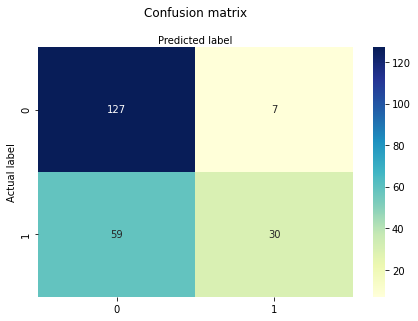

In [14]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7040358744394619
Precision: 0.8108108108108109
Recall: 0.33707865168539325


In [22]:
(127+30)/(127+30+66)

0.7040358744394619

In [3]:
30/(30+7)

0.8108108108108109

In [28]:
30/89

0.33707865168539325

In [32]:
# creating function
def confusion_calc(X,y):
    
    # use train_test_splie to create training and testing data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    # instantiate model
    logreg = LogisticRegression()
    # fit the model with data 
    logreg.fit(X_train, y_train)
    # preform prediction on test set
    y_pred = logreg.predict(X_test)
    
    # creating metrics
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
#     print(cnf_matrix)
    
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))

/Users/davispage/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


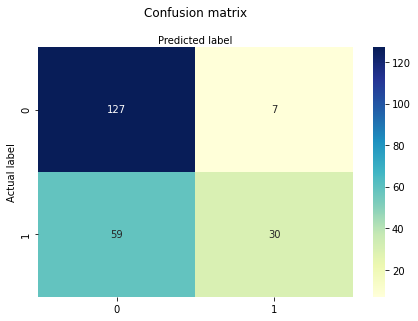

Accuracy: 0.7040358744394619
Precision: 0.8108108108108109
Recall: 0.33707865168539325


In [33]:
confusion_calc(X = full_data[['SibSp','Parch','Fare','Age_imp_median']],y = full_data["Survived"].values.reshape(-1,1))

In [36]:
157/(127+30+66)

0.7040358744394619